In [17]:
import pandas as pd

df = pd.read_csv('longtestdata-updated.csv')

# df = df.dropna(axis=1)

df

C:\Users\aspen\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (102) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,dateTime,usUnits,interval,altimeter,appTemp,appTemp1,barometer,batteryStatus1,batteryStatus2,batteryStatus3,...,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128
0,1667961120,1,1,30.395750,46.170887,NaN,30.393,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1667961060,1,1,30.393750,46.097248,NaN,30.391,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1667961000,1,1,30.391750,44.970710,NaN,30.389,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1667960940,1,1,30.391750,44.407441,NaN,30.389,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1667960880,1,1,30.392750,43.844172,NaN,30.390,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4945,1667635920,1,1,30.044709,67.072397,NaN,30.042,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4946,1667635860,1,1,30.043709,67.774592,NaN,30.041,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4947,1667635800,1,1,30.044709,67.211323,NaN,30.042,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4948,1667635740,1,1,30.043709,67.211323,NaN,30.041,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[False False False False False False False False False False False False
 False False False  True False False False False]
[47.12 46.76 46.22 46.4  44.78 45.14 46.4  46.58 46.76 47.3  48.56 48.92
 48.38 50.9  51.62 55.58 59.36 65.84 66.92 67.46 60.8  62.06 62.24 63.32
 64.04 65.66 66.02 66.02 64.94 64.4  63.5  60.8  59.9  58.64 52.34 50.72
 50.18 48.92 49.46 50.72 50.54 49.82 48.74 48.38 47.12 46.22 48.02 48.92
 50.36 50.9  51.62 51.44 51.62 56.66 62.24 57.56 54.5  51.98 49.28 42.08
 40.28 37.76 35.78 35.06 35.6  35.06 35.24 35.24 34.7  35.78 35.78 35.96
 36.14 36.32 37.58 37.58 37.22 38.12 39.2 ]


<ipython-input-148-fcf81a15ddfb>:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(alph[::int(len(alph)/nticks)])


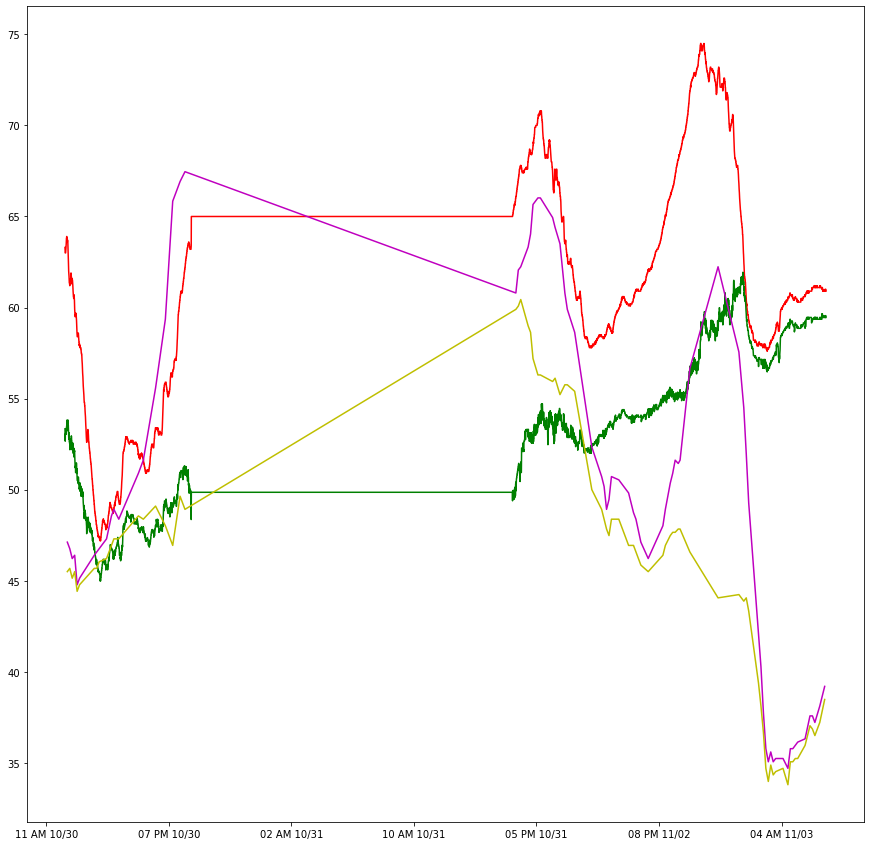

In [148]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from datetime import datetime
import json
import numpy as np


with open('observations.json', 'r') as f:
    cgp = json.load(f)

xs = df['dateTime'].tolist()
# print(times[:10])
# print(df['dateTime'][:10])

# times = []
temps = [np.nan]*len(df['dateTime'])
tds = [np.nan]*len(df['dateTime'])
for ob in cgp['features']:
    props = ob['properties']
    dt_obj = datetime.strptime(props['timestamp'], '%Y-%m-%dT%H:%M:%S+00:00')
#     print(int(dt_obj.timestamp()))
#     print(int(dt_obj.timestamp()) in xs)
    if props['temperature']['value'] is not None and int(dt_obj.timestamp()) in xs:
        temps[xs.index(int(dt_obj.timestamp()))] = props['temperature']['value']*9/5 + 32
        tds[xs.index(int(dt_obj.timestamp()))] = props['dewpoint']['value']*9/5 + 32
#         temps.append(props['temperature']['value']*9/5 + 32)
#         tds.append(props['dewpoint']['value']*9/5 + 32)
#         times.append(dt_obj.timestamp())
        
temps = np.array(temps).astype(np.double)
tds = np.array(tds).astype(np.double)
xs = np.array(xs)
tempmask = np.isfinite(temps)
tdmask = np.isfinite(tds)
print(tempmask[4:24])
# print(temps)
# print(len(xs))

plt.rcParams['figure.figsize'] = (15,15)
fig, ax = plt.subplots()

def timeconv(dt):
#     print(dt)
    dt_obj = datetime.fromtimestamp(dt['dateTime'])
    return dt_obj.strftime('%I %p %m/%d')

df['time'] = df.apply(lambda row: timeconv(row), axis=1)

alph = df['time']
nticks = 8

print(temps[tempmask])
ax.plot(xs,df['outTemp'], 'r')
ax.plot(xs,df['dewpoint'], 'g')
ax.plot(xs[tempmask],temps[tempmask], 'm')
# ax.scatter(xs,temps, 'm')
ax.plot(xs[tdmask],tds[tdmask], 'y')
# ax.set_xlim(1667208240,1667490840)
# ax.set_xlim(1667118300,1667271840)

ax.xaxis.set_major_locator(MaxNLocator(nticks))
ax.set_xticklabels(alph[::int(len(alph)/nticks)])
plt.gca().invert_xaxis()

# pl.savefig('ticklabels.png', dpi=300)


1667961120
1667635680
[False False False False False False False False False False False False
 False  True False False False False False False]
[ 9.17143596  9.17143596 10.28990376  8.05296816  6.93450036 10.28990376
 11.40837156  9.17143596  8.05296816 12.75053292  9.17143596 10.28990376
  6.93450036 10.28990376 12.75053292 12.75053292  9.17143596 10.28990376
 10.28990376  9.17143596 12.75053292  8.05296816 11.40837156  6.93450036
  5.81603256  6.93450036  3.3554034   3.3554034   4.69756476  3.3554034
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          3.3554034   4.69756476
  8.05296816  8.05296816 10.28990376 11.40837156 11.40837156 11.40837156
 12.75053292 10.28990376 11.40837156 10.28990376  9.17143596 12.75053292
 10.28990376 10.28990376  8.05296816  3.3554034   9.17143596  4.69756476
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.

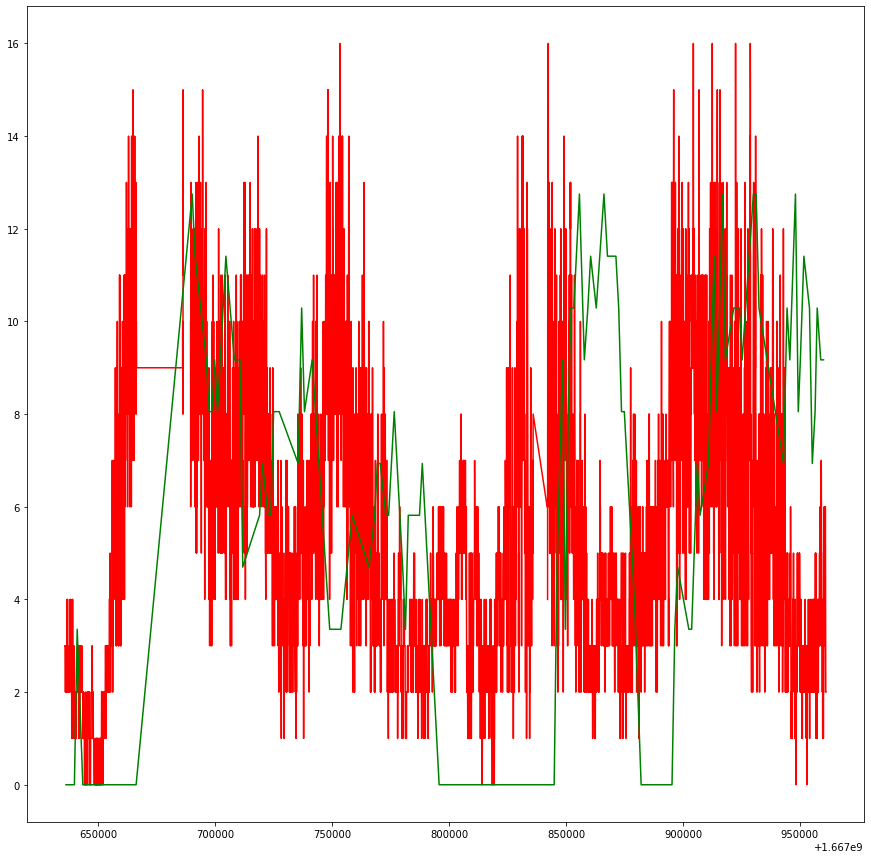

In [30]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from datetime import datetime
import json
import numpy as np


with open('observations-updated.json', 'r') as f:
    cgp = json.load(f)

xs = df['dateTime'].tolist()
print(xs[0])
print(xs[-1])
# print(times[:10])
# print(df['dateTime'][:10])

# times = []
temps = [np.nan]*len(df['dateTime'])
# tds = [np.nan]*len(df['dateTime'])
for ob in cgp['features']:
    props = ob['properties']
    dt_obj = datetime.strptime(props['timestamp'], '%Y-%m-%dT%H:%M:%S+00:00')
#     print(int(dt_obj.timestamp()))
#     print(int(dt_obj.timestamp()) in xs)
    if props['windSpeed']['value'] is not None and int(dt_obj.timestamp()) in xs:
        temps[xs.index(int(dt_obj.timestamp()))] = props['windSpeed']['value']*0.621371
#         tds[xs.index(int(dt_obj.timestamp()))] = props['dewpoint']['value']
#         temps.append(props['temperature']['value']*9/5 + 32)
#         tds.append(props['dewpoint']['value']*9/5 + 32)
#         times.append(dt_obj.timestamp())
        
temps = np.array(temps).astype(np.double)
# tds = np.array(tds).astype(np.double)
xs = np.array(xs)
tempmask = np.isfinite(temps)
# tdmask = np.isfinite(tds)
print(tempmask[4:24])
# print(temps)
# print(len(xs))

plt.rcParams['figure.figsize'] = (15,15)
fig, ax = plt.subplots()

# def timeconv(dt):
# #     print(dt)
#     dt_obj = datetime.fromtimestamp(dt['dateTime'])
#     return dt_obj.strftime('%I %p %m/%d')

# df['time'] = df.apply(lambda row: timeconv(row), axis=1)

# alph = df['time']
# nticks = 8

print(temps[tempmask])
ax.plot(xs,df['windSpeed'], 'r')
# ax.plot(xs,df['dewpoint'], 'g')
ax.plot(xs[tempmask],temps[tempmask], 'g')
# ax.scatter(xs,temps, 'm')
# ax.plot(xs[tdmask],tds[tdmask], 'y')
# ax.set_xlim(1667208240,1667490840)
# ax.set_xlim(1667910000,1667961120)

print('___________')
print(xs[tempmask][0])
print(xs[tempmask][-1])
print(temps[tempmask][0])
print(temps[tempmask][-1])
print(xs[0])
print(xs[-1])
print(df['windSpeed'][0])
print(df['windSpeed'][:5])
print(df['windSpeed'][len(df['windSpeed'])-1])

# ax.xaxis.set_major_locator(MaxNLocator(nticks))
# ax.set_xticklabels(alph[::int(len(alph)/nticks)])
# plt.gca().invert_xaxis()

# pl.savefig('ticklabels.png', dpi=300)


In [145]:
xs[-2560]

1667271840

<ipython-input-96-7477144070ef>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(alph[::int(len(alph)/nticks)])


[Text(1666800000.0, 0, '11 AM 11/03'),
 Text(1666900000.0, 0, '04 AM 11/03'),
 Text(1667000000.0, 0, '08 PM 11/02'),
 Text(1667100000.0, 0, '05 PM 10/31'),
 Text(1667200000.0, 0, '10 AM 10/31'),
 Text(1667300000.0, 0, '02 AM 10/31'),
 Text(1667400000.0, 0, '07 PM 10/30'),
 Text(1667500000.0, 0, '11 AM 10/30'),
 Text(1667600000.0, 0, '04 AM 10/30')]

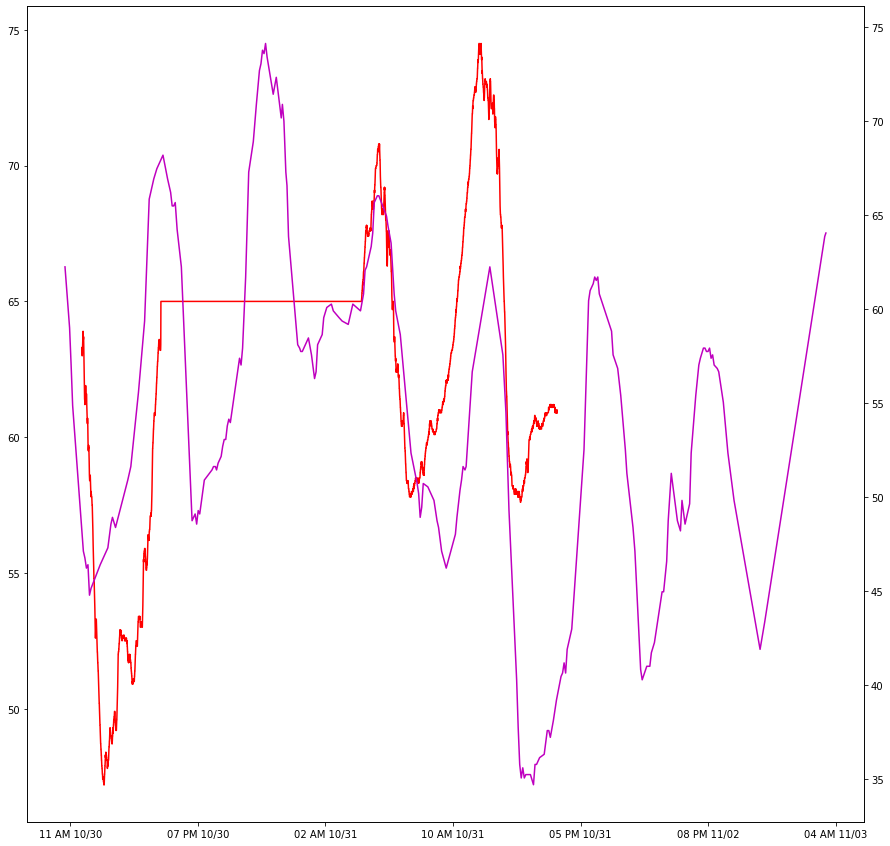

In [96]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from datetime import datetime
import json
import numpy as np


with open('observations.json', 'r') as f:
    cgp = json.load(f)

xs = df['dateTime'].tolist()
# print(times[:10])
# print(df['dateTime'][:10])

times = []
temps = []
tds = []
for ob in cgp['features']:
    props = ob['properties']
    dt_obj = datetime.strptime(props['timestamp'], '%Y-%m-%dT%H:%M:%S+00:00')
#     print(int(dt_obj.timestamp()))
#     print(int(dt_obj.timestamp()) in xs)
    if props['temperature']['value'] is not None:
#         temps[xs.index(int(dt_obj.timestamp()))] = props['temperature']['value']*9/5 + 32
#         tds[xs.index(int(dt_obj.timestamp()))] = props['dewpoint']['value']*9/5 + 32
        temps.append(props['temperature']['value']*9/5 + 32)
        tds.append(props['dewpoint']['value']*9/5 + 32)
        times.append(dt_obj.timestamp())
        
# temps = np.array(temps).astype(np.double)
# tds = np.array(tds).astype(np.double)
# xs = np.array(xs)
# tempmask = np.isfinite(temps).astype(int)
# tdmask = np.isfinite(tds).astype(int)
# print(tempmask[4:24])
# print(temps)
# print(len(xs))

plt.rcParams['figure.figsize'] = (15,15)
fig, ax = plt.subplots()

def timeconv(dt):
#     print(dt)
    dt_obj = datetime.fromtimestamp(dt['dateTime'])
    return dt_obj.strftime('%I %p %m/%d')

df['time'] = df.apply(lambda row: timeconv(row), axis=1)

alph = df['time']
nticks = 8

ax2 = ax.twinx()
# print(temps[tempmask])
ax.plot(xs,df['outTemp'], 'r')
# ax.plot(xs,df['dewpoint'], 'g')
ax2.plot(times,temps, 'm')
# ax.plot(xs[tdmask],tds[tdmask], 'y')
plt.gca().invert_xaxis()

ax.xaxis.set_major_locator(MaxNLocator(nticks))
ax.set_xticklabels(alph[::int(len(alph)/nticks)])

# pl.savefig('ticklabels.png', dpi=300)


In [62]:
1667487300 in xs

True

In [61]:
xs[50:60]

[1667487840,
 1667487780,
 1667487720,
 1667487660,
 1667487600,
 1667487540,
 1667487480,
 1667487420,
 1667487360,
 1667487300]

In [74]:
xs

[1667490840,
 1667490780,
 1667490720,
 1667490660,
 1667490600,
 1667490540,
 1667490480,
 1667490420,
 1667490360,
 1667490300,
 1667490240,
 1667490180,
 1667490120,
 1667490060,
 1667490000,
 1667489940,
 1667489880,
 1667489820,
 1667489760,
 1667489700,
 1667489640,
 1667489580,
 1667489520,
 1667489460,
 1667489400,
 1667489340,
 1667489280,
 1667489220,
 1667489160,
 1667489100,
 1667489040,
 1667488980,
 1667488920,
 1667488860,
 1667488800,
 1667488740,
 1667488680,
 1667488620,
 1667488560,
 1667488500,
 1667488440,
 1667488380,
 1667488320,
 1667488260,
 1667488200,
 1667488140,
 1667488080,
 1667488020,
 1667487960,
 1667487900,
 1667487840,
 1667487780,
 1667487720,
 1667487660,
 1667487600,
 1667487540,
 1667487480,
 1667487420,
 1667487360,
 1667487300,
 1667487240,
 1667487180,
 1667487120,
 1667487060,
 1667487000,
 1667486940,
 1667486880,
 1667486820,
 1667486760,
 1667486700,
 1667486640,
 1667486580,
 1667486520,
 1667486460,
 1667486400,
 1667486340,
 1667486280,

In [75]:
temps

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 47.120000000000005,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 46.76,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 46.22,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 46.4,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 44.78,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 45.14,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

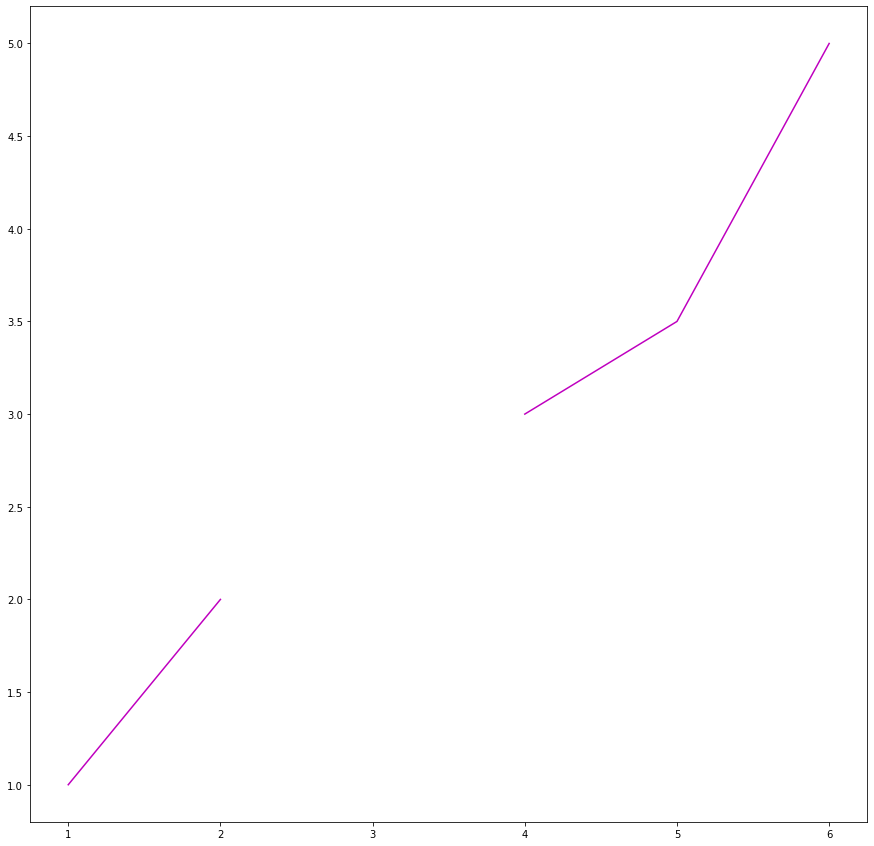

In [81]:

plt.plot([1,2,3,4,5,6],[1,2,np.nan,3,3.5,5,], 'm')

In [38]:

with open('observations.json', 'r') as f:
    cgp = json.load(f)
    
times = []
temps = []
tds = []
for ob in cgp['features']:
    props = ob['properties']
    dt_obj = datetime.strptime(props['timestamp'], '%Y-%m-%dT%H:%M:%S+00:00')
    if props['temperature']['value'] is not None:
        temps.append(props['temperature']['value']*9/5 + 32)
        tds.append(props['dewpoint']['value']*9/5 + 32)
        times.append(dt_obj.timestamp())
        
times

[1667504100.0,
 1667500500.0,
 1667499300.0,
 1667498100.0,
 1667489700.0,
 1667488500.0,
 1667487300.0,
 1667486100.0,
 1667484900.0,
 1667483700.0,
 1667476500.0,
 1667475300.0,
 1667474100.0,
 1667470500.0,
 1667468100.0,
 1667466900.0,
 1667464500.0,
 1667454900.0,
 1667452500.0,
 1667446500.0,
 1667441700.0,
 1667438100.0,
 1667434500.0,
 1667432100.0,
 1667427300.0,
 1667423700.0,
 1667421300.0,
 1667420100.0,
 1667418900.0,
 1667417700.0,
 1667416200.0,
 1667412900.0,
 1667404500.0,
 1667402100.0,
 1667400900.0,
 1667399700.0,
 1667398500.0,
 1667394900.0,
 1667388900.0,
 1667387700.0,
 1667386200.0,
 1667385300.0,
 1667384100.0,
 1667381700.0,
 1667380500.0,
 1667379300.0,
 1667378100.0,
 1667376900.0,
 1667375700.0,
 1667374500.0,
 1667367300.0,
 1667366100.0,
 1667364900.0,
 1667362500.0,
 1667360100.0,
 1667356500.0,
 1667354100.0,
 1667352900.0,
 1667351700.0,
 1667350500.0,
 1667349300.0,
 1667348100.0,
 1667346900.0,
 1667345700.0,
 1667340900.0,
 1667338500.0,
 166733460